In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report



import os
for dirname, _, filenames in os.walk('/dataset2/fruits-360_dataset/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint


In [13]:
train_path = "training/"
test_path = "test/"

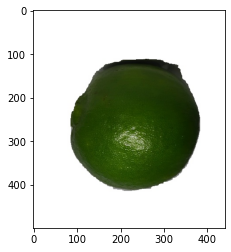

In [14]:
img = load_img(train_path + "Orange unripe/orangevertical6.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

In [15]:
img = img_to_array(img)
img.shape

(500, 440, 3)

In [20]:
model = Sequential()

model.add(Conv2D(128, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
# model.add(Conv2D(32, 3, activation="relu"))

model.add(MaxPooling2D())
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(5000, activation = "relu"))
model.add(Dense(1024, activation = "relu"))
model.add(Dense(512, activation = "relu"))
#model.add(Dense(128, activation = "softmax"))
# model.add(Dense(64, activation = "softmax"))
model.add(Dense(15, activation = "softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 33856)            

In [21]:
model.compile(loss="categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 16,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = 16,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 9997 images belonging to 15 classes.
Found 1422 images belonging to 15 classes.


In [23]:
filepath="fruit_detection_2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 40,
                   epochs = 40,
                   validation_data = test_generator,
                   validation_steps = 40)



Epoch 1/40


<ipython-input-23-c97c164cfbc5>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


40/40 [==============================] - 40s 995ms/step - loss: 2.5622 - accuracy: 0.1554 - val_loss: 2.5083 - val_accuracy: 0.1109
Epoch 2/40
40/40 [==============================] - 38s 939ms/step - loss: 2.2534 - accuracy: 0.2281 - val_loss: 2.0030 - val_accuracy: 0.3219
Epoch 3/40
40/40 [==============================] - 42s 1s/step - loss: 1.8910 - accuracy: 0.3375 - val_loss: 1.7226 - val_accuracy: 0.4469
Epoch 4/40
40/40 [==============================] - 42s 1s/step - loss: 1.6791 - accuracy: 0.3844 - val_loss: 1.3079 - val_accuracy: 0.5906
Epoch 5/40
40/40 [==============================] - 43s 1s/step - loss: 1.4897 - accuracy: 0.4380 - val_loss: 1.2160 - val_accuracy: 0.5547
Epoch 6/40
40/40 [==============================] - 40s 1000ms/step - loss: 1.3844 - accuracy: 0.5297 - val_loss: 0.9942 - val_accuracy: 0.7797
Epoch 7/40
40/40 [==============================] - 43s 1s/step - loss: 1.1443 - accuracy: 0.5562 - val_loss: 0.7602 - val_accuracy: 0.7172
Epoch 8/40
40/40 [===

In [55]:
from keras.models import load_model

model.save("fruit_ripe_detection_2.h5")


In [23]:
import tensorflow as tf
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
test_generator.classes[22687]
# img = load_img(train_path + "Quince/r_305_100.jpg")
# plt.imshow(img)
# plt.axis("on")
# plt.show()

In [1]:
predictions = probability_model.predict(test_generator)


NameError: name 'probability_model' is not defined

In [ ]:
b=predictions[8]
print(b)


In [ ]:
np.argmax(b)


In [ ]:
import os

folder = 'archive/fruits-360/Test'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

print(sub_folders[26])

In [ ]:
model = Sequential()

model.add(Conv2D(256, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())

model.add(Conv2D(128, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.20))

model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D())

|model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(5000, activation = "relu"))
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.20))

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
\model.add(Dense(131, activation = "relu"))

model.summary()

In [ ]:
WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50 batches). You may need to use the repeat() function when building your dataset.